In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('Iris.csv')

In [97]:
df[50:56]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Z_score
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,1.396829
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0.672249
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,1.276066
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,-0.414621
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,0.793012
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,-0.173094


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().mean()*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

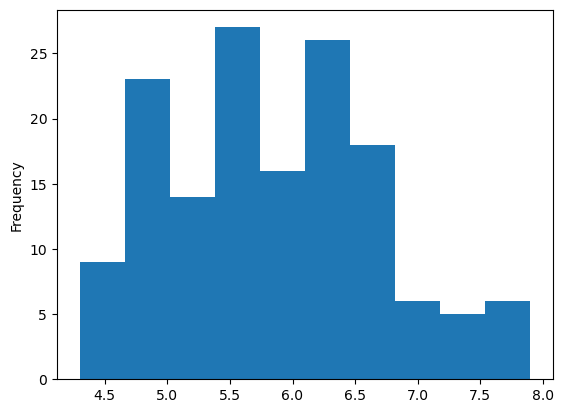

In [8]:
df['SepalLengthCm'].plot(kind='hist')
plt.show()

In [9]:
df['SepalLengthCm'].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [10]:
mean = df.SepalLengthCm.mean()

In [11]:
mean

5.843333333333334

In [12]:
std = df.SepalLengthCm.std()

In [13]:
std

0.8280661279778629

In [14]:
minimum = mean - 3*std

In [15]:
maximum = mean + 3*std

In [16]:
minimum

3.3591349493997447

In [17]:
maximum

8.327531717266922

In [18]:
df[(df.SepalLengthCm < 3.3591349493997447) | (df.SepalLengthCm > 8.327531717266922 )]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [38]:
Z_score = (df.SepalLengthCm - df.SepalLengthCm.mean()) / df.SepalLengthCm.std()

In [40]:
Z_score

0     -0.897674
1     -1.139200
2     -1.380727
3     -1.501490
4     -1.018437
         ...   
145    1.034539
146    0.551486
147    0.793012
148    0.430722
149    0.068433
Name: SepalLengthCm, Length: 150, dtype: float64

In [21]:
percentile25 = df['SepalLengthCm'].quantile(0.25)

In [22]:
percentile25

5.1

In [23]:
percentile50 = df['SepalLengthCm'].quantile(0.50)

In [24]:
percentile75 = df['SepalLengthCm'].quantile(0.75)

In [25]:
percentile50

5.8

In [26]:
percentile75

6.4

In [27]:
iqr = percentile75 - percentile50

In [28]:
iqr

0.6000000000000005

In [29]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile50 - 1.5*iqr

In [30]:
upper_limit

7.300000000000001

In [31]:
lower_limit

4.899999999999999

In [121]:
X = df.drop(columns=['Species','Z_score','Id'])


In [70]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [72]:
clf = tree.DecisionTreeClassifier()

In [73]:
clf.fit(X,y)

DecisionTreeClassifier()

In [100]:
clf.predict([[51,51,51,51]])

C:\Users\patel\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [75]:
feature_names = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

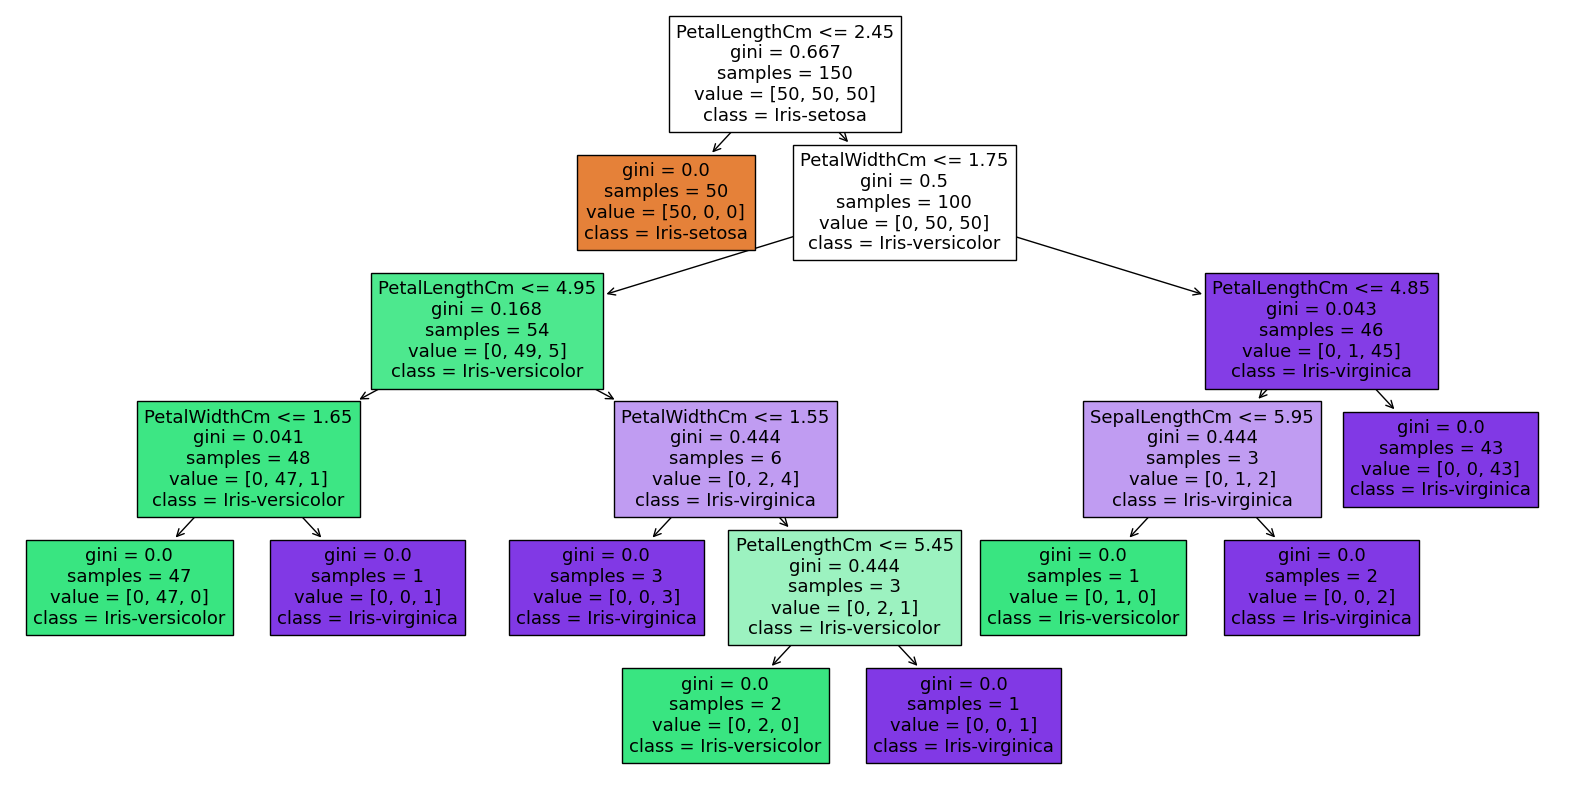

In [78]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=df['Species'].unique().tolist(), filled=True)
plt.show()


In [103]:
y_pred = clf.predict(X)

In [104]:
accuracy = accuracy_score(y,y_pred)

In [105]:
accuracy

1.0

In [109]:
precision = precision_score(y,y_pred,average=None)

In [110]:
precision

array([1., 1., 1.])

In [113]:
precision = precision_score(y, y_pred, average='macro')  # Adjust average as needed
print(f"Precision: {precision:.4f}")

Precision: 1.0000


In [117]:
d = pd.get_dummies(df.Species).astype(int)

In [118]:
d

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [130]:
m = pd.concat([df,d],axis='columns')

In [120]:
m

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Z_score,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.897674,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.139200,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.380727,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.501490,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.018437,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.034539,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.551486,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.793012,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.430722,0,0,1


In [131]:
y = df['Iris-setosa','Iris-versicolor','Iris-virginica']

KeyError: ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

In [127]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [128]:
r2_score = r2_score(y,y_pred)

ValueError: could not convert string to float: 'Iris-setosa'

In [132]:
git.pull


NameError: name 'git' is not defined